## Change Log

#### Dataset & Model Overview

- After getting a decent understanding of how a supervised neural network like the one I did in predicting wine quality with a FFNN, I wanted to try working with image recognition and detection.
- I am using this dataset (https://www.cs.toronto.edu/~kriz/cifar.html), this dataset is a subset of the 80 million tiny images dataset.
- This dataset has 60,000 images with 10 classes and 6000 images per class.
- I want this model to be able to correctly classify the class that the image belongs to.
- I am planning to use a Convolutional Neural Network (CNN) for this, I chose a CNN because they are very good at pattern recognition and image detection with classification which is exactly what is needed for this task.

#### Learnings & Findings

- I am extracting the dataset in the way specified here (https://www.cs.toronto.edu/~kriz/cifar.html) alongside extra code to extract and combine them into a singular csv file.
- I am going to try the CNN structure similar to what is found here (https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/), I used Tensorflow for my last model and it worked well so I am going to try and use it again.
- I had to learn how the image classification is structured in tensorflow, my article that I referenced above has some information on it but I used some other sites for research such as (https://www.kaggle.com/code/anandhuh/image-classification-using-cnn-for-beginners).
- This diagram is a really good visual of how the image classification model works step by step:

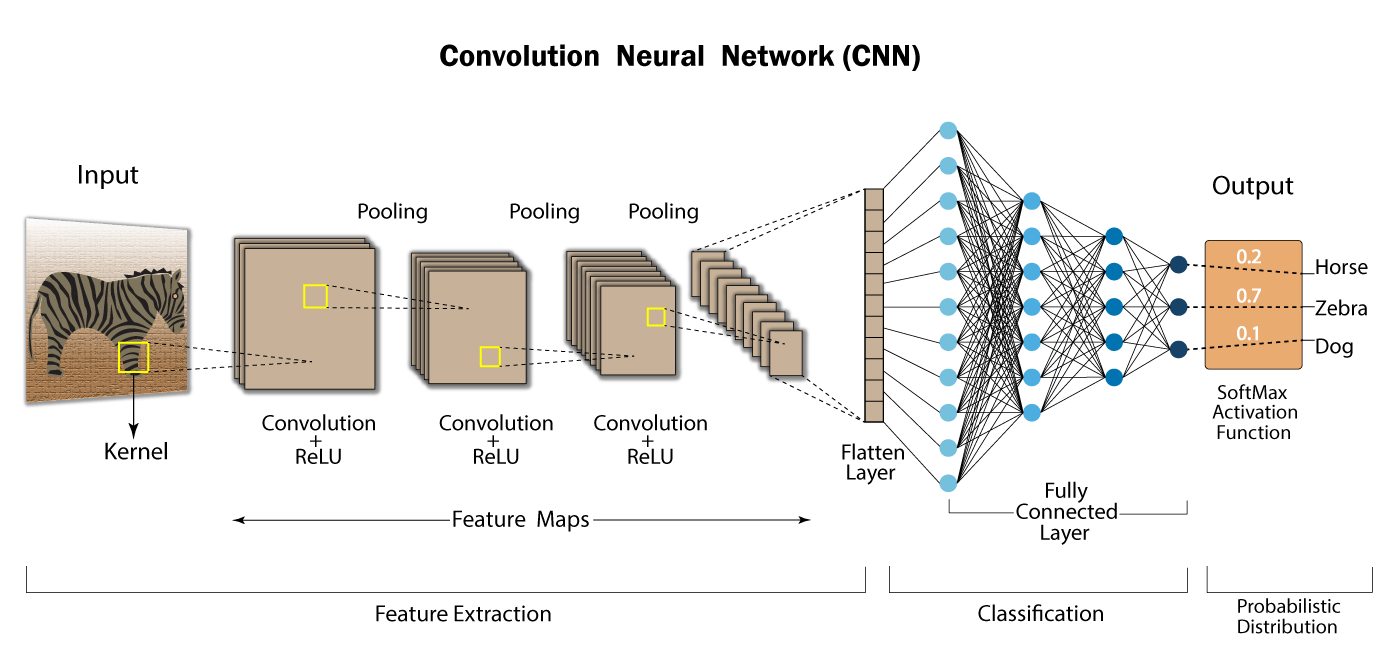
- I followed this as a baseline but I had to do research to understand how all of it was working and how to adapt it to my code.
- Ran into an issue with how my data was being structured after I changed it to a CSV file. When I was trying to fit the model it was throwing an error because my data was structured incorrectly for the CNN. I was struggling to figure out why but I ended up asking ChatGPT for help here. It told me that the issue is that it was being stored as a 1D array where as the CNN model requires it to be a 3D image. So it converted it to a numpy arrray and then reshaped the data so that it would fit the model better.
- I have an accuracy rating of roughly 52%, I want to see if upping the epochs by a few will make a big difference to this model's learning.
- After running tests upping the epochs isn't making a huge difference as it went up to 56% accuracy as the best.
- I seem to have an overfitting issue as when I look at the training epochs I'm getting great ratings such as high 70's and 80's, I am going to do some research on some methods I can do to reduce the likelihood of overfitting in this model.


#### Results
- I ended up achieving 60% accuracy on this model
- I learned about how to combat overfitting within a CNN by using dropouts
- I now understand the process of how image classification works by using Neural Networks

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

Here I am just importing the necessary libraries and technologies that I may need to build this model.


In [3]:
import pickle


def unpickle(file):
    with open(file, "rb") as fo:
        batch = pickle.load(fo, encoding="bytes")
    return batch


data_list = []
labels_list = []

# Loop through all batch files
for i in range(1, 6):
    file = f"data_batch_{i}"  # Modify if needed
    batch = unpickle(file)

    data_list.append(batch[b"data"])  # Image data
    labels_list.append(batch[b"labels"])  # Labels

# Convert lists to NumPy arrays
data = np.vstack(data_list)
labels = np.hstack(labels_list)

# Convert to DataFrame
columns = [f"pixel_{i}" for i in range(data.shape[1])]  # Column names for pixels
df = pd.DataFrame(data, columns=columns)
df.insert(0, "label", labels)  # Insert labels as the first column

# Save to CSV
df.to_csv("cifar10_data.csv", index=False)
print("CSV file saved successfully!")

KeyboardInterrupt: 

ChatGPT generated this for me as I wanted to store this as a CSV file rather than the way they were initially being handled.

What it is doing is, looping through each of the files which has 10,000 images in it and labels of what each image is of so the model can begin to build up an idea of what should be in each class, it then extracts the data and stores it in a pandas dataframe which can then be converted to a singular csv file.

I am now going to turn the test batch into a csv file as well.


In [ ]:
import pickle


def unpickle(file):
    with open(file, "rb") as fo:
        batch = pickle.load(fo, encoding="bytes")
    return batch


data_list = []
labels_list = []

file = "test_batch"
batch = unpickle(file)

data_list.append(batch[b"data"])  # Image data
labels_list.append(batch[b"labels"])  # Labels

# Convert lists to NumPy arrays
data = np.vstack(data_list)
labels = np.hstack(labels_list)

# Convert to DataFrame
columns = [f"pixel_{i}" for i in range(data.shape[1])]  # Column names for pixels
df = pd.DataFrame(data, columns=columns)
df.insert(0, "label", labels)  # Insert labels as the first column

# Save to CSV
df.to_csv("cifar10_test_data.csv", index=False)
print("CSV file saved successfully!")

In [4]:
df = pd.read_csv("cifar10_data.csv")
test_df = pd.read_csv("cifar10_test_data.csv")

# Separate features and labels
X = df.drop("label", axis=1).values  # Convert to NumPy array
y = df["label"].values  # Convert labels to NumPy array

# Reshape X to match CNN input (num_samples, 32, 32, 3)
X = X.reshape(-1, 32, 32, 3)

# Do the same for test data
X_test = test_df.drop("label", axis=1).values  # Convert to NumPy array
y_test = test_df["label"].values  # Convert labels to NumPy array

# Reshape X_test to match CNN input
X_test = X_test.reshape(-1, 32, 32, 3)

# Normalize pixel values (important for CNNs)
X = X / 255.0
X_test = X_test / 255.0

Here I'm just assigning both datasets and the target variables for both the training and test dataset.

My next step is now to add the layers to the model that I will need for the classification.

##### Update

I had to get ChatGPT to help me retructure my dataframe. Full explanation in the change log.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This is the structure that I have seen online when doing research on these kinds of models. After doing some more research about what the functions that are being called are doing it is as follows:

A Sequential model is being used as each layer is using the last layers output as its input, this is important for something like image clasification because we arre filtering and condensing the image so it needs to be executed in sequential order.

The Conv2D function is used to add a convolutional layer, what this does is it sets an amount of features which in this case is 32, and these will scan over the image in a 3x3 grid looking for key edges or features that are standing out. Then I have the ReLU activation function which just turns negative values into 0. Finally the input shape is just telling the model what the shape of my image is so you have to specify the height, width and colourscale so 3 is RGB for example.

The MaxPooling2d function is used to downsize the image that we have. So how this works is it will move across in a 2x2 grid and look for the square with the most important features in it and it removes the rest, this is so it is focusing on the key information and not background and unimportant parts of the image.

This process is then repeated a couple more times so that the model can continue to try and correctly identify the key parts of the image.


In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

After we have scanned and gotten the most important information by using the convolutional layers and max pooling to condense them, we now need to flatten the results and add the dense layers. 

The primary function of these layers is to categorise or classify which image belongs in which categoty so this is the part of the model which is actually deciding on where to put each image.

In [18]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

This is a similar compiler to the one I used in my last Neural Network, the adam optimiser is still being used due to its ability to automatically adjust the weights and this time to calculate the loss we are using Sparse Categorical Cross Entropy, this is from the example I was looking at but after doing some research about what it is and how it works, it labels each of the categories that it detects and then this can be used to assign each image to its correct category by giving it the correct label based off that. The from_logits = true adds a softmax activation function to the data before it calculates the amount of loss on the image.

In [19]:
model.fit(X, y, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2371 - loss: 2.0316 - val_accuracy: 0.4143 - val_loss: 1.6111
Epoch 2/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4180 - loss: 1.5857 - val_accuracy: 0.4561 - val_loss: 1.4959
Epoch 3/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4859 - loss: 1.4294 - val_accuracy: 0.4865 - val_loss: 1.4136
Epoch 4/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5132 - loss: 1.3522 - val_accuracy: 0.5103 - val_loss: 1.3589
Epoch 5/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5474 - loss: 1.2489 - val_accuracy: 0.5241 - val_loss: 1.3279


In [ ]:
accuracy = model.evaluate(X_test, y_test)

print("Accuracy: " + str(accuracy[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5326 - loss: 1.3240
Accuracy: 0.5241000056266785


In [21]:
model.fit(X, y, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5708 - loss: 1.1971 - val_accuracy: 0.5291 - val_loss: 1.3339
Epoch 2/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5906 - loss: 1.1500 - val_accuracy: 0.5460 - val_loss: 1.2799
Epoch 3/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6121 - loss: 1.0915 - val_accuracy: 0.5345 - val_loss: 1.3111
Epoch 4/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6293 - loss: 1.0328 - val_accuracy: 0.5445 - val_loss: 1.3200
Epoch 5/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6534 - loss: 0.9870 - val_accuracy: 0.5605 - val_loss: 1.2686
Epoch 6/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6650 - loss: 0.9355 - val_accuracy: 0.5613 - val_loss: 1.3020
Epoch 7/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6816 - loss: 0.8946 - val_accuracy: 0.5748 - val_loss: 1.2827
Epoch 8/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7057 - loss: 0.8474 - val_accu

In [22]:
accuracy = model.evaluate(X_test, y_test)

print("Accuracy: " + str(accuracy[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5679 - loss: 1.3865
Accuracy: 0.5630999803543091


In [23]:
model.fit(X, y, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7381 - loss: 0.7318 - val_accuracy: 0.5622 - val_loss: 1.4009
Epoch 2/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7577 - loss: 0.6906 - val_accuracy: 0.5683 - val_loss: 1.4089
Epoch 3/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7723 - loss: 0.6482 - val_accuracy: 0.5585 - val_loss: 1.4693
Epoch 4/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7758 - loss: 0.6346 - val_accuracy: 0.5539 - val_loss: 1.5727
Epoch 5/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7866 - loss: 0.5989 - val_accuracy: 0.5673 - val_loss: 1.5461
Epoch 6/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7976 - loss: 0.5808 - val_accuracy: 0.5602 - val_loss: 1.5734
Epoch 7/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8124 - loss: 0.5387 - val_accuracy: 0.5465 - val_loss: 1.6911
Epoch 8/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8216 - loss: 0.5081 - val_accu

In [24]:
accuracy = model.evaluate(X_test, y_test)

print("Accuracy: " + str(accuracy[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5360 - loss: 2.0802
Accuracy: 0.5339999794960022


### Observations Of Model So Far:
As can be seen above, I have retrained the model 3 times with varying amounts of epochs to see if it would make much of a difference to the level of effectiveness. Overall it hasn't made much of a difference, the best result I have gotten was at 10 epochs where the accuracy rating was at about 56% which still isn't where I want it to be. One thing I did notice was how high the accuracy was for the training data in comparison to the validation data, this means that my data is overfitting to the model. I want to see how I can fix this I am going to do some research on it and try a few different methods to fix the overfitting issue.

#### Overfitting Issue
- I have been doing some research on ways to stop overfitting in CNN models and I came across this discussion on stack overflow (https://stackoverflow.com/questions/62136364/how-to-avoid-overfitting-in-cnn), in this they discuss the topic of dropouts. I hadn't heard of this before so I went and did some more research on it and I found this article from medium which explains it well (https://medium.com/@vishnuam/dropout-in-convolutional-neural-networks-cnn-422a4a17da41). Dropouts work by randomly dropping 20-50% of the neurons in a network on each epoch, so on each epoch different neurons will be dropped which makes the network learn the models more than just memorising them. This is going to be the first thing I try to stop my overfitting issue.

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10))


I have now added some dropout layers to the model, I chose 40% and 50% at random to see how it performs, I am going to run it with 10 epochs now instead of 5,10 and 15 as 10 had the best performance previously.

In [32]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [35]:
model.fit(X, y, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6004 - loss: 1.1385 - val_accuracy: 0.5852 - val_loss: 1.1726
Epoch 2/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6141 - loss: 1.0837 - val_accuracy: 0.5899 - val_loss: 1.1825
Epoch 3/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6238 - loss: 1.0769 - val_accuracy: 0.5838 - val_loss: 1.1737
Epoch 4/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6242 - loss: 1.0654 - val_accuracy: 0.5908 - val_loss: 1.1765
Epoch 5/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6379 - loss: 1.0231 - val_accuracy: 0.5914 - val_loss: 1.1918
Epoch 6/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6428 - loss: 1.0008 - val_accuracy: 0.5854 - val_loss: 1.1958
Epoch 7/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6438 - loss: 1.0093 - val_accuracy: 0.5977 - val_loss: 1.1968
Epoch 8/15
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6572 - loss: 0.9682 - val_accu

In [36]:
accuracy = model.evaluate(X_test, y_test)

print("Accuracy: " + str(accuracy[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6058 - loss: 1.2091
Accuracy: 0.6011999845504761


After trying dropping 40% and then 50% after the dense layer, it actually dropped the accuracy down to 50%.

My next step was to lower them so I lowered them to 20% and then 40%. This made a slight difference bumping it to 57% accurate.

I then wanted to try more Epochs again just to see if it made a difference and this did give me a nice bump to 60% accuracy score. 

I did look at using early stopping too but I am not using a big amount of epochs so it didn't make a massive difference to the dataset